In [ ]:
CUSTOMER ANALYSIS

A well-known company with a diverse range of products aims to enhance its understanding of customer behavior and campaign acceptance. The company seeks to develop a comprehensive model using historical customer data to predict whether customers will accept the campaigns conducted by the company. Additionally, the company aims to segment its customers into distinct clusters based on their behavior.

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [81]:
data = pd.read_csv(r"C:\Users\hp\Downloads\customer_train.csv")
data

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,1675,1675,4712,1991,D3,Bertunangan,20193000.0,0,0,28-11-2012,...,4,0,0,0,0,0,0,3,11,0
1676,1676,1676,1170,1975,S1,Menikah,27573000.0,1,0,25-03-2013,...,8,0,0,0,0,0,0,3,11,0
1677,1677,1677,6347,1979,SMA,Lajang,15862000.0,1,0,27-06-2013,...,8,0,0,0,0,0,0,3,11,0
1678,1678,1678,4065,1976,S3,Menikah,49544000.0,1,0,12-02-2013,...,7,0,0,0,0,0,0,3,11,0


Importing the dataset containing customer-related information, indicating behavioral attributes potential opportunities for customer segmentation and predictive modeling to optimize campaign acceptance

Since the skewness of the "Income" data is moderate (0.399328), and accurate imputations are critical for your research objectives, you can consider using median imputation. Median imputation is robust to outliers and preserves the central tendency of the data, making it suitable for moderately skewed distributions.    ---------?

In [24]:
data.info

<bound method DataFrame.info of       Unnamed: 0.1  Unnamed: 0    ID  Year_Birth Education Marital_Status  \
0                0           0  5524        1957        S1         Lajang   
1                1           1  2174        1954        S1         Lajang   
2                2           2  4141        1965        S1    Bertunangan   
3                3           3  6182        1984        S1    Bertunangan   
4                4           4  5324        1981        S3        Menikah   
...            ...         ...   ...         ...       ...            ...   
1675          1675        1675  4712        1991        D3    Bertunangan   
1676          1676        1676  1170        1975        S1        Menikah   
1677          1677        1677  6347        1979       SMA         Lajang   
1678          1678        1678  4065        1976        S3        Menikah   
1679          1679        1679  8230        1980        S1        Menikah   

          Income  Kidhome  Teenhome Dt_Cust


This appears to be a dataset with 1680 rows and 31 columns. It contains various demographic and behavioral attributes of customers, such as age, education, marital status, income, and response to marketing campaigns.

In [25]:
data.describe()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,1680.000000,1680.000000,1680.000000,1680.000000,1.663000e+03,1680.000000,1680.000000,1680.000000,1.680000e+03,1680.000000,...,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.0,1680.0,1680.000000
mean,839.500000,839.500000,5551.728571,1968.847619,5.201434e+07,0.452381,0.500000,49.083333,3.048994e+05,25918.452381,...,5.332143,0.071429,0.074405,0.069048,0.062500,0.011905,0.010119,3.0,11.0,0.144048
std,485.118542,485.118542,3238.155703,12.027192,2.148248e+07,0.546901,0.550055,28.930637,3.387051e+05,39532.059109,...,2.449814,0.257616,0.262507,0.253611,0.242134,0.108490,0.100113,0.0,0.0,0.351243
min,0.000000,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,419.750000,419.750000,2823.250000,1960.000000,3.568800e+07,0.000000,0.000000,24.000000,2.400000e+04,1000.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,839.500000,839.500000,5381.000000,1970.000000,5.125000e+07,0.000000,0.000000,50.000000,1.730000e+05,8000.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1259.250000,1259.250000,8370.750000,1977.000000,6.812200e+07,1.000000,1.000000,74.000000,4.942500e+05,32000.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1679.000000,1679.000000,11191.000000,1996.000000,1.623970e+08,2.000000,2.000000,99.000000,1.492000e+06,199000.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Here, 
The "count" row indicates the number of non-null values present in each column, revealing potential missing data.
Mean: The "mean" row represents the average value of each column. For instance, the mean income is approximately 52,014,340.
Std: The "std" row shows the standard deviation, indicating the dispersion of values around the mean. In the "Income" column, the standard deviation is around 21,482,480.
Min and Max: These values denote the minimum and maximum values observed in each column, respectively. For example, the minimum income is 1,730,000, and the maximum income is 162,397,000.
Percentiles: Percentiles (25th, 50th, and 75th) provide insights into the distribution of data. For instance, the 25th percentile (Q1) for income is approximately 35,688,000, the median (50th percentile or Q2) is around 51,250,000, and the 75th percentile (Q3) is about 68,122,000. These percentiles help understand the spread and central tendency of the income distribution.

In [82]:
duplicate_rows = data[data.duplicated()]
print("Duplicate Rows : ", duplicate_rows)

Duplicate Rows :  Empty DataFrame
Columns: [Unnamed: 0.1, Unnamed: 0, ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntCoke, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 31 columns]



This code identifies and prints duplicate rows in the DataFrame data. Duplicated rows are those that have exactly the same values across all columns. It's useful for identifying and potentially removing redundant data.

In [83]:
cols_to_delete = ["Unnamed: 0.1", "Unnamed: 0","Education","Marital_Status","ID"]
data = data.drop(columns = cols_to_delete)

In [84]:
data["Age"] = 2024-data["Year_Birth"]
del data["Year_Birth"]
data
# Creating a new column for total spending
data['TotalSpending'] = data['MntCoke'] + data['MntFruits'] + data['MntMeatProducts'] + \
                        data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
# Dropping the original spending columns
data.drop(['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
           'MntSweetProducts', 'MntGoldProds'], axis=1, inplace=True)

data['TotalCampaignAcceptance'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] +data['AcceptedCmp5']
# Dropping the original spending columns
data.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
           'AcceptedCmp5'], axis=1, inplace=True)

# Displaying the DataFrame with the new column and without the original spending columns
print(data)

          Income  Kidhome  Teenhome Dt_Customer  Recency  NumDealsPurchases  \
0     58138000.0        0         0  04-09-2012       58                  3   
1     46344000.0        1         1  08-03-2014       38                  2   
2     71613000.0        0         0  21-08-2013       26                  1   
3     26646000.0        1         0  10-02-2014       26                  2   
4     58293000.0        1         0  19-01-2014       94                  5   
...          ...      ...       ...         ...      ...                ...   
1675  20193000.0        0         0  28-11-2012       18                  1   
1676  27573000.0        1         0  25-03-2013       45                  4   
1677  15862000.0        1         0  27-06-2013       26                  1   
1678  49544000.0        1         0  12-02-2013        0                  2   
1679  33228000.0        1         0  23-01-2014       28                  1   

      NumWebPurchases  NumCatalogPurchases  NumStor

It calculates the age of each customer by subtracting their birth year from the current year (2024) and stores it in a new "Age" column. Then, it deletes the original "Year_Birth" column.
It creates a new column called "TotalSpending" by summing up the spending amounts from various product categories (e.g., 'MntCoke', 'MntFruits', etc.).
It drops the original spending columns since the total spending information has been aggregated into the new "TotalSpending" column.
It calculates the total campaign acceptance by summing up the acceptance flags from different marketing campaigns ('AcceptedCmp1' to 'AcceptedCmp5') and stores the result in a new "TotalCampaignAcceptance" column.
It drops the original campaign acceptance columns since the total campaign acceptance information has been aggregated into the new "TotalCampaignAcceptance" column.

In [85]:
data['date_column'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
#import pandas as pd
#from datetime import datetime

# Assuming 'Dt_Customer' is a column in your DataFrame 'df'
# Convert 'Dt_Customer' column to datetime type with the correct format
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

# Calculate the number of days since 'Dt_Customer' to today's date
data['days_Since_Enrollment'] = (datetime.now() - data['Dt_Customer']).dt.days

# Display the DataFrame with the new column
#print(data2)
del data["date_column"]
del data["Dt_Customer"]
data

,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Age,TotalSpending,TotalCampaignAcceptance,days_Since_Enrollment
0,58138000.0,0,0,58,3,8,10,4,7,0,3,11,1,67,1617000,0,4241
1,46344000.0,1,1,38,2,1,1,2,5,0,3,11,0,70,27000,0,3691
2,71613000.0,0,0,26,1,8,2,10,4,0,3,11,0,59,776000,0,3890
3,26646000.0,1,0,26,2,2,0,4,6,0,3,11,0,40,53000,0,3717
4,58293000.0,1,0,94,5,5,3,6,5,0,3,11,0,43,422000,0,3739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,20193000.0,0,0,18,1,1,1,4,4,0,3,11,0,33,82000,0,4156
1676,27573000.0,1,0,45,4,5,1,4,8,0,3,11,0,49,244000,0,4039
1677,15862000.0,1,0,26,1,1,0,3,8,0,3,11,0,45,36000,0,3945
1678,49544000.0,1,0,0,2,5,1,8,7,0,3,11,0,48,404000,0,4080


It converts the 'Dt_Customer' column from string format to datetime format using the specified date format '%d-%m-%Y' and stores it in a new column called 'date_column'.
It calculates the number of days since 'Dt_Customer' to the current date and stores the result in a new column named 'days_Since_Enrollment'.
It deletes the 'date_column' and 'Dt_Customer' columns from the DataFrame.
Overall, this code helps in converting the date-related information into a more usable format and calculates the duration since enrollment.

In [86]:
data.isnull().sum()


Income                     17
Kidhome                     0
Teenhome                    0
Recency                     0
NumDealsPurchases           0
NumWebPurchases             0
NumCatalogPurchases         0
NumStorePurchases           0
NumWebVisitsMonth           0
Complain                    0
Z_CostContact               0
Z_Revenue                   0
Response                    0
Age                         0
TotalSpending               0
TotalCampaignAcceptance     0
days_Since_Enrollment       0
dtype: int64


This code checks for missing values (null values) in each column of the DataFrame 'data' and returns the sum of missing values for each column. It helps in identifying which columns have missing data. And here we can see 17 null values in Income column.

In [87]:
# Median imputation for null values in the "Income" column
income_median = data['Income'].median()
data['Income'] = data['Income'].fillna(income_median)

Since the skewness of the "Income" data is moderate (0.399328), and accurate imputations are critical for your research objectives, you can consider using median imputation. Median imputation is robust to outliers and preserves the central tendency of the data, making it suitable for moderately skewed distributions.

This code calculates the median of the 'Income' column and then fills in the missing values in the 'Income' column with this median value. It's a common strategy for handling missing data, especially when the variable is skewed and the median is a more robust measure of central tendency compared to the mean.

In [88]:
'''import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the data

# Calculate skewness for each feature
skewness = data.skew()

# Plot box plot for each feature
fig, axes = plt.subplots(nrows=1, ncols=len(data.columns), figsize=(15, 6))
for i, col in enumerate(data.columns):
    data.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)
plt.show()

# Print skewness values
print("Skewness for each feature:")
print(skewness)'''

'import pandas as pd\nimport matplotlib.pyplot as plt\n\n# Assuming \'data\' is your DataFrame containing the data\n\n# Calculate skewness for each feature\nskewness = data.skew()\n\n# Plot box plot for each feature\nfig, axes = plt.subplots(nrows=1, ncols=len(data.columns), figsize=(15, 6))\nfor i, col in enumerate(data.columns):\n    data.boxplot(column=col, ax=axes[i])\n    axes[i].set_title(col)\n    axes[i].tick_params(axis=\'x\', rotation=45)\nplt.show()\n\n# Print skewness values\nprint("Skewness for each feature:")\nprint(skewness)'

In [89]:
'''import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the data

# Calculate skewness for each feature
skewness = data.skew()

# Determine the number of rows and columns for subplots
num_cols = len(data.columns)
num_rows = 1  # You can adjust this based on your preference

# Calculate the figure size based on the number of subplots
fig_width = min(20, num_cols * 5)
fig_height = num_rows * 6

# Plot box plots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(fig_width, fig_height))
for i, col in enumerate(data.columns):
    ax = axes[i] if num_rows == 1 else axes[i // num_cols, i % num_cols]
    data.boxplot(column=col, ax=ax)
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

# Print skewness values
print("Skewness for each feature:")
print(skewness)'''


'import pandas as pd\nimport matplotlib.pyplot as plt\n\n# Assuming \'data\' is your DataFrame containing the data\n\n# Calculate skewness for each feature\nskewness = data.skew()\n\n# Determine the number of rows and columns for subplots\nnum_cols = len(data.columns)\nnum_rows = 1  # You can adjust this based on your preference\n\n# Calculate the figure size based on the number of subplots\nfig_width = min(20, num_cols * 5)\nfig_height = num_rows * 6\n\n# Plot box plots\nfig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(fig_width, fig_height))\nfor i, col in enumerate(data.columns):\n    ax = axes[i] if num_rows == 1 else axes[i // num_cols, i % num_cols]\n    data.boxplot(column=col, ax=ax)\n    ax.set_title(col)\n    ax.tick_params(axis=\'x\', rotation=45)\n\n# Adjust spacing between subplots\nplt.subplots_adjust(wspace=0.5, hspace=0.5)\n\nplt.show()\n\n# Print skewness values\nprint("Skewness for each feature:")\nprint(skewness)'

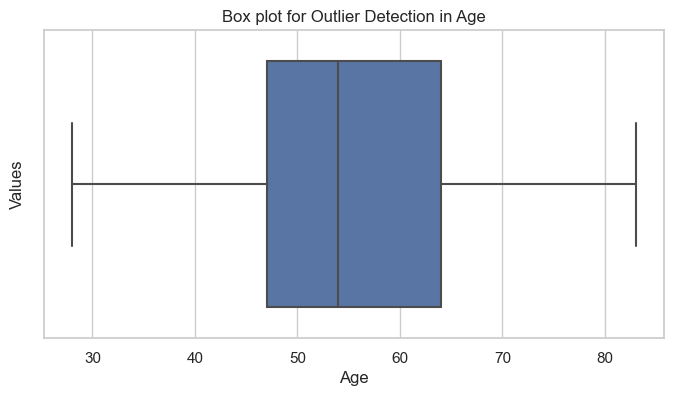

Skewness for Age: 0.0822621443966623


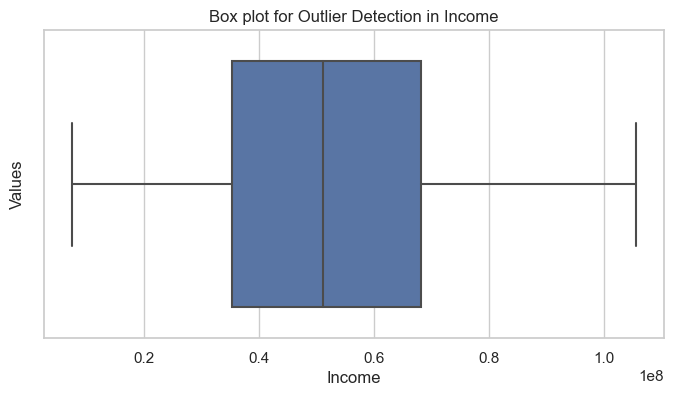

Skewness for Income: 0.05258632657430518


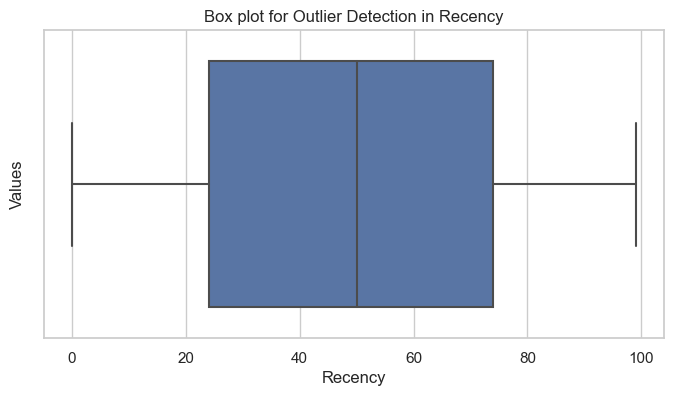

Skewness for Recency: -0.005570454407145145


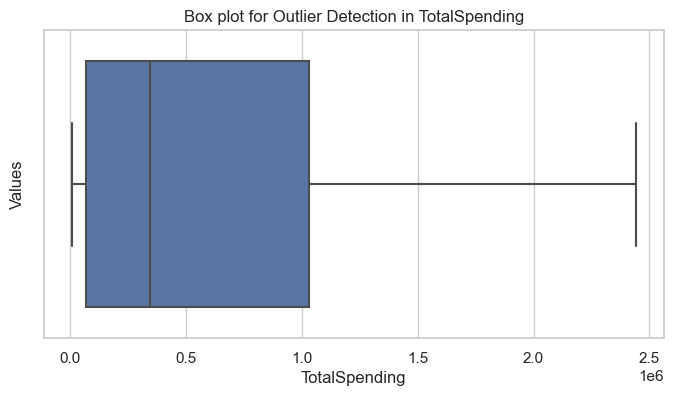

Skewness for TotalSpending: 0.875615433361619


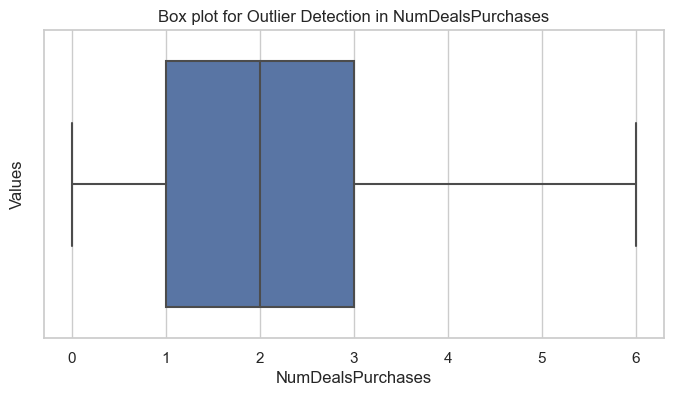

Skewness for NumDealsPurchases: 1.144390279623284


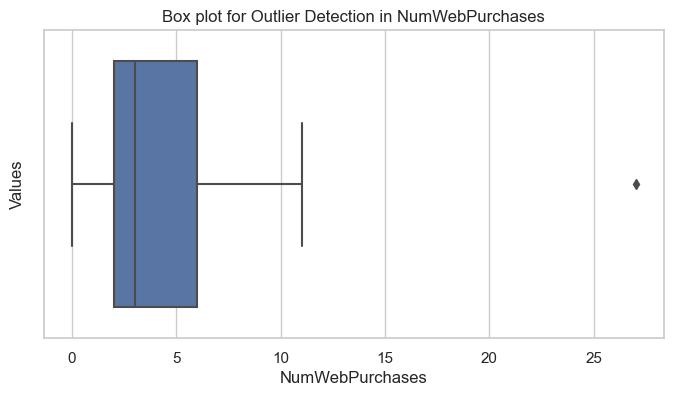

Skewness for NumWebPurchases: 1.1186862904439592


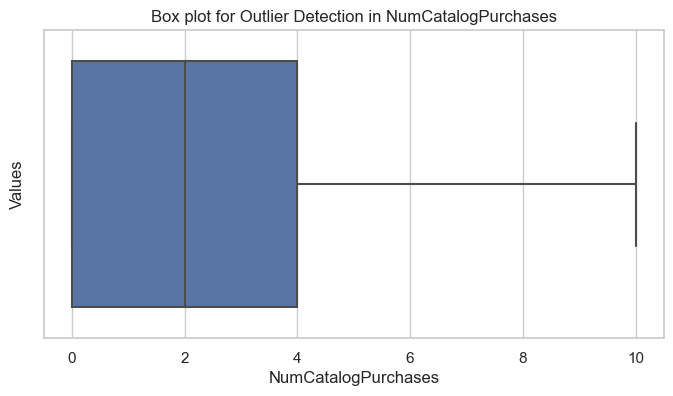

Skewness for NumCatalogPurchases: 1.059087053481508


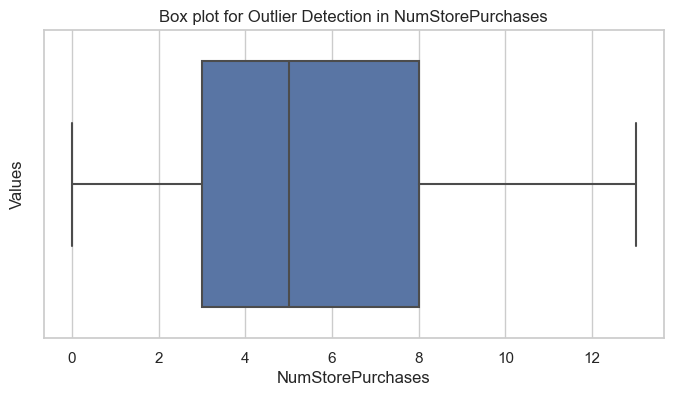

Skewness for NumStorePurchases: 0.7456335133000755


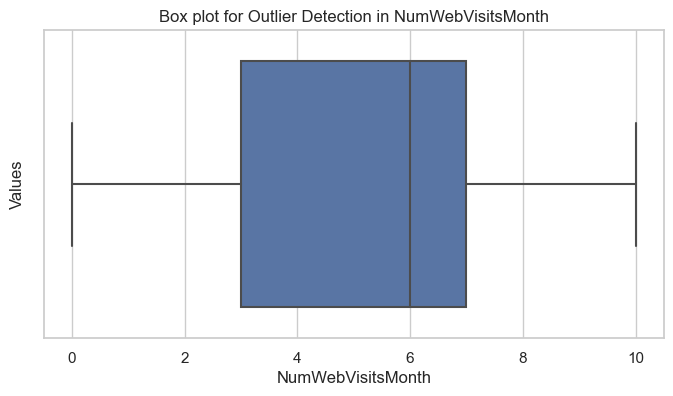

Skewness for NumWebVisitsMonth: -0.3156487293387003


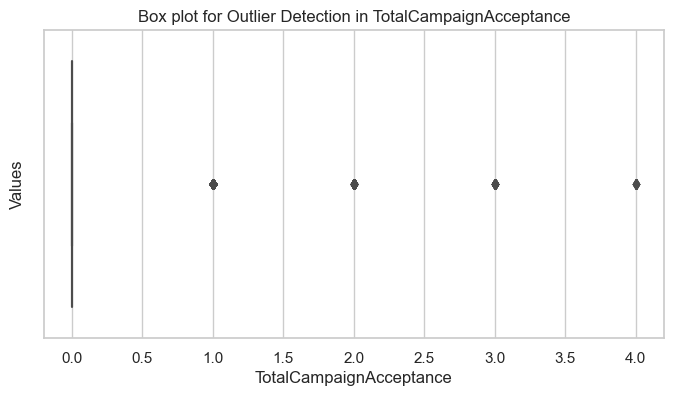

Skewness for TotalCampaignAcceptance: 2.7390954392064124


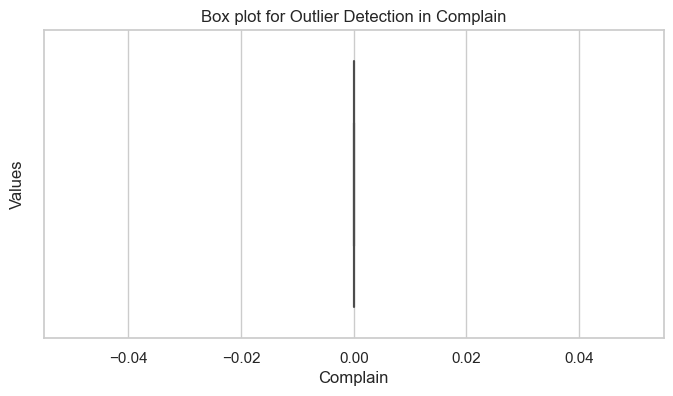

Skewness for Complain: 0


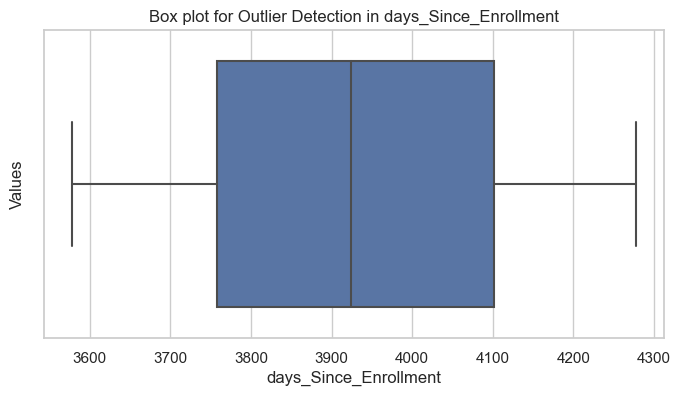

Skewness for days_Since_Enrollment: 0.021805858102171182


In [44]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#import pandas as pd

sns.set(style="whitegrid")

# List of numerical columns
numerical_columns = ['Age', 'Income','Recency', 
                     'TotalSpending', 'NumDealsPurchases', 
                     'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
                     'NumWebVisitsMonth', 'TotalCampaignAcceptance', 'Complain', 'days_Since_Enrollment'
                    ]

# Create box plots and calculate skewness for each numerical column
for column in numerical_columns:
    # Plot box plot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Box plot for Outlier Detection in {column}')
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()
    
    # Calculate skewness
    skewness = data[column].skew()
    print(f"Skewness for {column}: {skewness}")



This code generates box plots for each numerical column in the dataset, allowing you to visually inspect the distribution of values and identify potential outliers. Additionally, it calculates the skewness for each numerical column, providing insight into the symmetry of the distribution. Skewness values greater than 0 indicate right-skewed distributions, while values less than 0 indicate left-skewed distributions

This insight provides the skewness values for each numerical column in the dataset:

Age, Income, and Recency have skewness values close to zero, indicating approximately symmetric distributions.
TotalSpending, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, and NumStorePurchases have positive skewness values, suggesting right-skewed distributions.
NumWebVisitsMonth shows a slightly left-skewed distribution with a negative skewness value.
TotalCampaignAcceptance has a significantly high positive skewness value, indicating a heavily right-skewed distribution.
The Complain column does not have a skewness value as it contains constant values.
days_Since_Enrollment has a skewness value close to zero, suggesting a nearly symmetric distribution..

In [90]:
#from scipy.stats import zscore

# Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Identify columns for outlier removal using IQR
columns_iqr = ['Age','TotalSpending','NumDealsPurchases', 
                      'NumCatalogPurchases', 'NumStorePurchases',]

# Remove outliers using IQR
for column in columns_iqr:
    data = remove_outliers_iqr(data, column)
# Identify columns for outlier removal using Z-score
columns_zscore = ['Income','Complain','NumWebVisitsMonth']

# Calculate Z-scores for each column in X
z_scores = zscore(data[columns_zscore])

# Define a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3
# Identify outliers using Z-score
outliers_zscore = (np.abs(z_scores) > threshold).any(axis=1)

# Remove outliers using Z-score from X
data = data[~outliers_zscore]
data


,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Age,TotalSpending,TotalCampaignAcceptance,days_Since_Enrollment
0,58138000.0,0,0,58,3,8,10,4,7,0,3,11,1,67,1617000,0,4241
1,46344000.0,1,1,38,2,1,1,2,5,0,3,11,0,70,27000,0,3691
2,71613000.0,0,0,26,1,8,2,10,4,0,3,11,0,59,776000,0,3890
3,26646000.0,1,0,26,2,2,0,4,6,0,3,11,0,40,53000,0,3717
4,58293000.0,1,0,94,5,5,3,6,5,0,3,11,0,43,422000,0,3739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,20193000.0,0,0,18,1,1,1,4,4,0,3,11,0,33,82000,0,4156
1676,27573000.0,1,0,45,4,5,1,4,8,0,3,11,0,49,244000,0,4039
1677,15862000.0,1,0,26,1,1,0,3,8,0,3,11,0,45,36000,0,3945
1678,49544000.0,1,0,0,2,5,1,8,7,0,3,11,0,48,404000,0,4080


This code performs outlier removal using two different methods:

Outlier Removal with Interquartile Range (IQR):

It defines a function remove_outliers_iqr to remove outliers based on the IQR method.
Outliers are removed for columns 'Age', 'TotalSpending', 'NumDealsPurchases', 'NumCatalogPurchases', and 'NumStorePurchases' using the IQR method.
Outlier Removal with Z-score:

Z-scores are calculated for columns 'Income', 'Complain', and 'NumWebVisitsMonth'.
Outliers are identified based on a threshold of 3 standard deviations from the mean.
Data points with Z-scores exceeding the threshold are considered outliers and removed.
The code snippet demonstrates a robust approach to handling outliers using both IQR and Z-score methods, ensuring the data is cleansed from extreme values that might adversely affect analysis or modeling.

After the rmoval of outliers, the rows has come down to 1568 from 1680 rows.

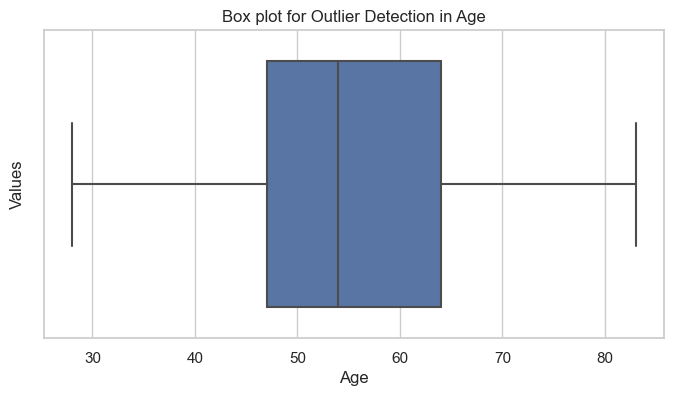

Skewness for Age: 0.0822621443966623


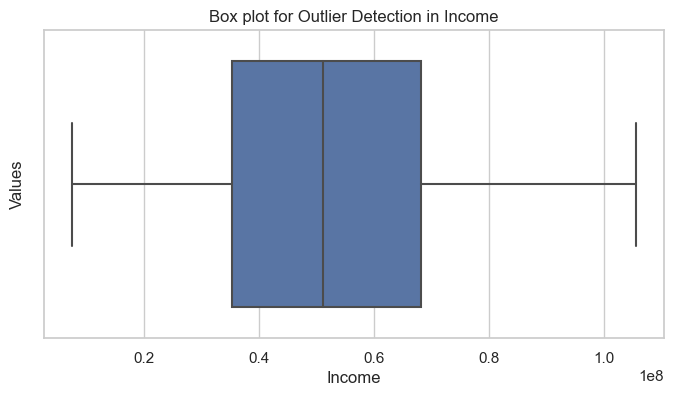

Skewness for Income: 0.053732316144694675


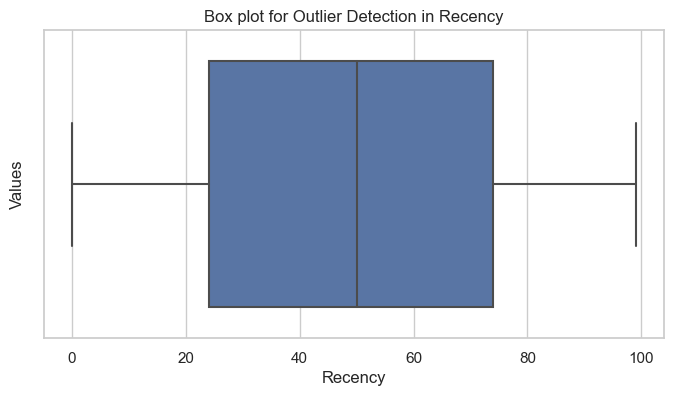

Skewness for Recency: -0.005570454407145145


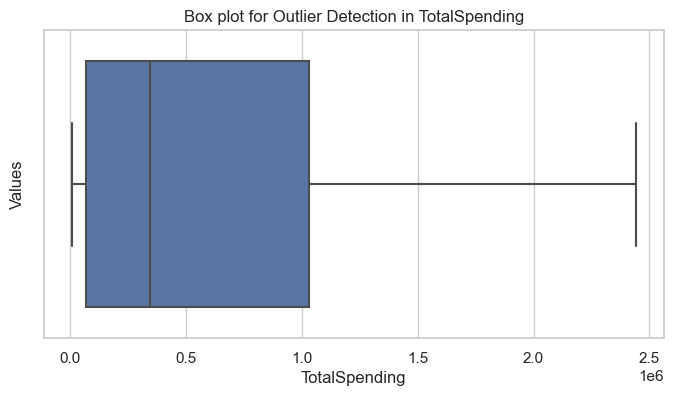

Skewness for TotalSpending: 0.875615433361619


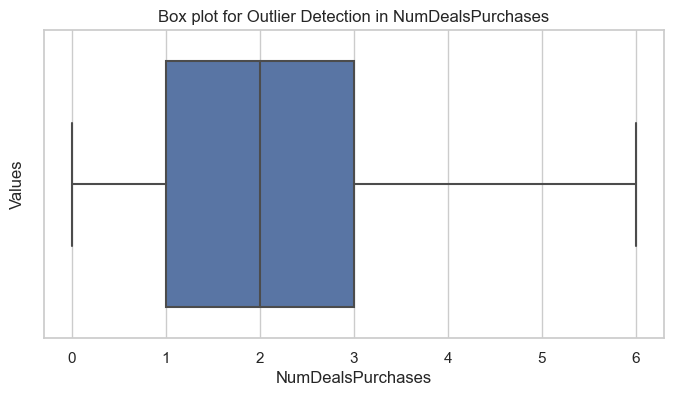

Skewness for NumDealsPurchases: 1.144390279623284


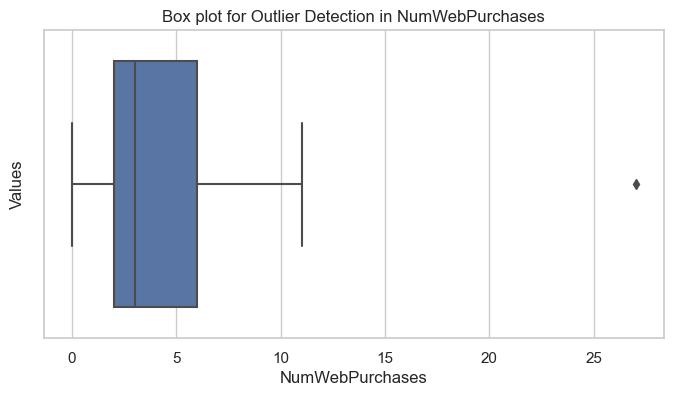

Skewness for NumWebPurchases: 1.1186862904439592


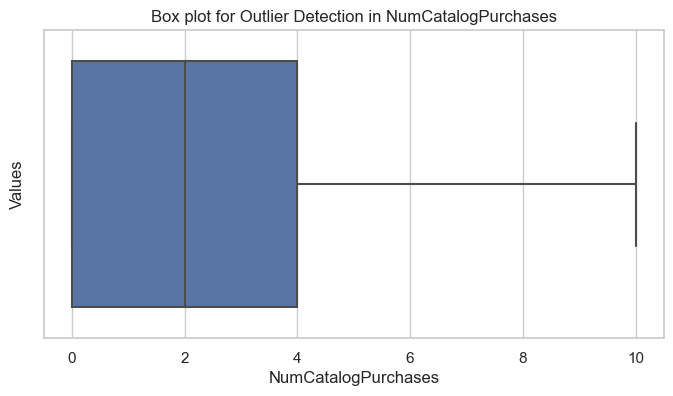

Skewness for NumCatalogPurchases: 1.059087053481508


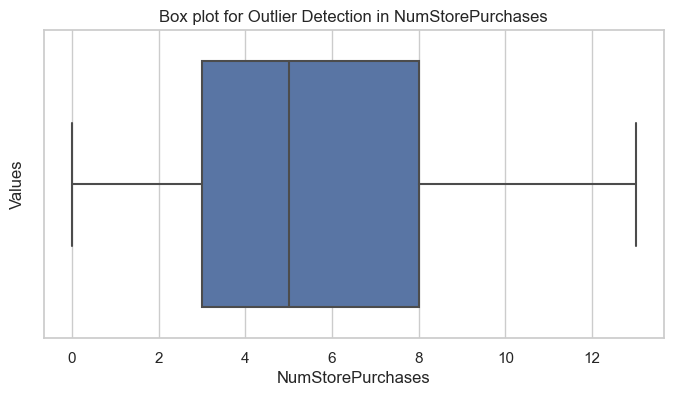

Skewness for NumStorePurchases: 0.7456335133000755


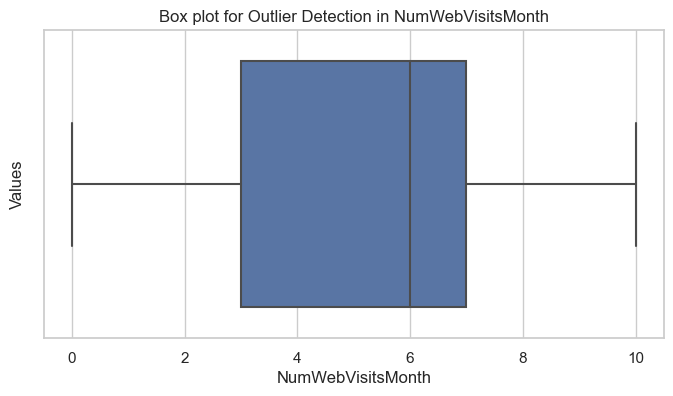

Skewness for NumWebVisitsMonth: -0.3156487293387003


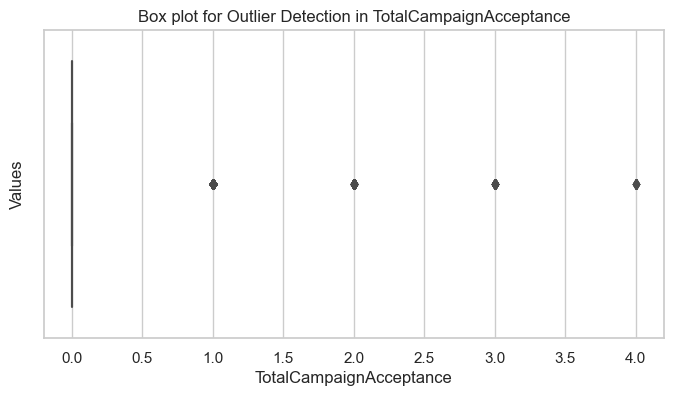

Skewness for TotalCampaignAcceptance: 2.7390954392064124


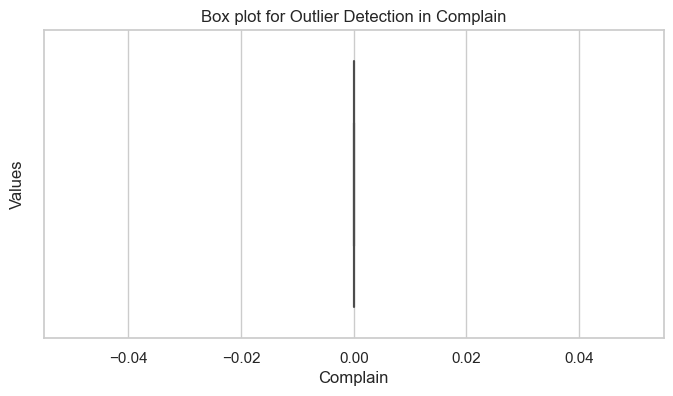

Skewness for Complain: 0


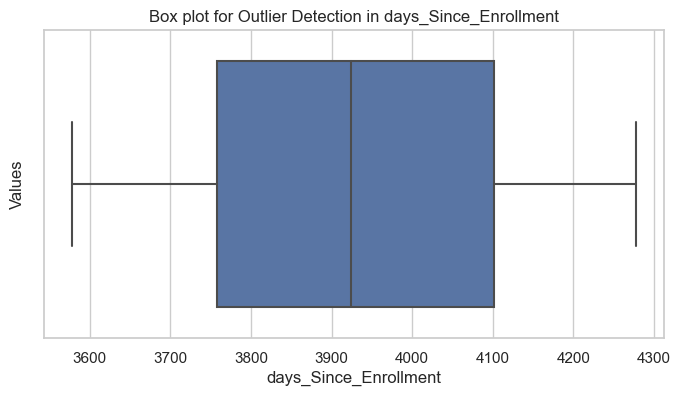

Skewness for days_Since_Enrollment: 0.021805858102171182


In [91]:
'''import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd'''

sns.set(style="whitegrid")

# Assuming 'data' is your DataFrame containing the data after removing outliers

# List of numerical columns
numerical_columns = ['Age', 'Income','Recency', 
                     'TotalSpending', 'NumDealsPurchases', 
                     'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
                     'NumWebVisitsMonth', 'TotalCampaignAcceptance', 'Complain', 'days_Since_Enrollment'
                    ]

# Create box plots and calculate skewness for each numerical column
for column in numerical_columns:
    # Plot box plot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Box plot for Outlier Detection in {column}')
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()
    
    # Calculate skewness
    skewness = data[column].skew()
    print(f"Skewness for {column}: {skewness}")


These skewness values provide insights into the distributional properties of the data after outlier removal. Positive skewness in columns like "NumDealsPurchases," "NumWebPurchases," and "NumCatalogPurchases" indicates right-skewed distributions, while negative skewness in "NumWebVisitsMonth" indicates a left-skewed distribution. The "TotalCampaignAcceptance" column remains highly positively skewed even after outlier removal, suggesting a heavily skewed distribution in this feature.

Correlation Matrix:
                              Age    Income   Recency  TotalSpending  \
Age                      1.000000  0.221945  0.027528       0.131201   
Income                   0.221945  1.000000 -0.017952       0.832149   
Recency                  0.027528 -0.017952  1.000000       0.010314   
TotalSpending            0.131201  0.832149  0.010314       1.000000   
NumDealsPurchases        0.068774 -0.180596  0.048780      -0.137662   
NumWebPurchases          0.153972  0.521424  0.007254       0.561600   
NumCatalogPurchases      0.160199  0.738374  0.017707       0.813211   
NumStorePurchases        0.154476  0.689416 -0.003420       0.693761   
NumWebVisitsMonth       -0.140011 -0.660508 -0.010923      -0.529152   
TotalCampaignAcceptance  0.021457  0.375519 -0.034155       0.455104   
days_Since_Enrollment   -0.003528 -0.021064  0.036703       0.156547   

                         NumDealsPurchases  NumWebPurchases  \
Age                               0.068774         0

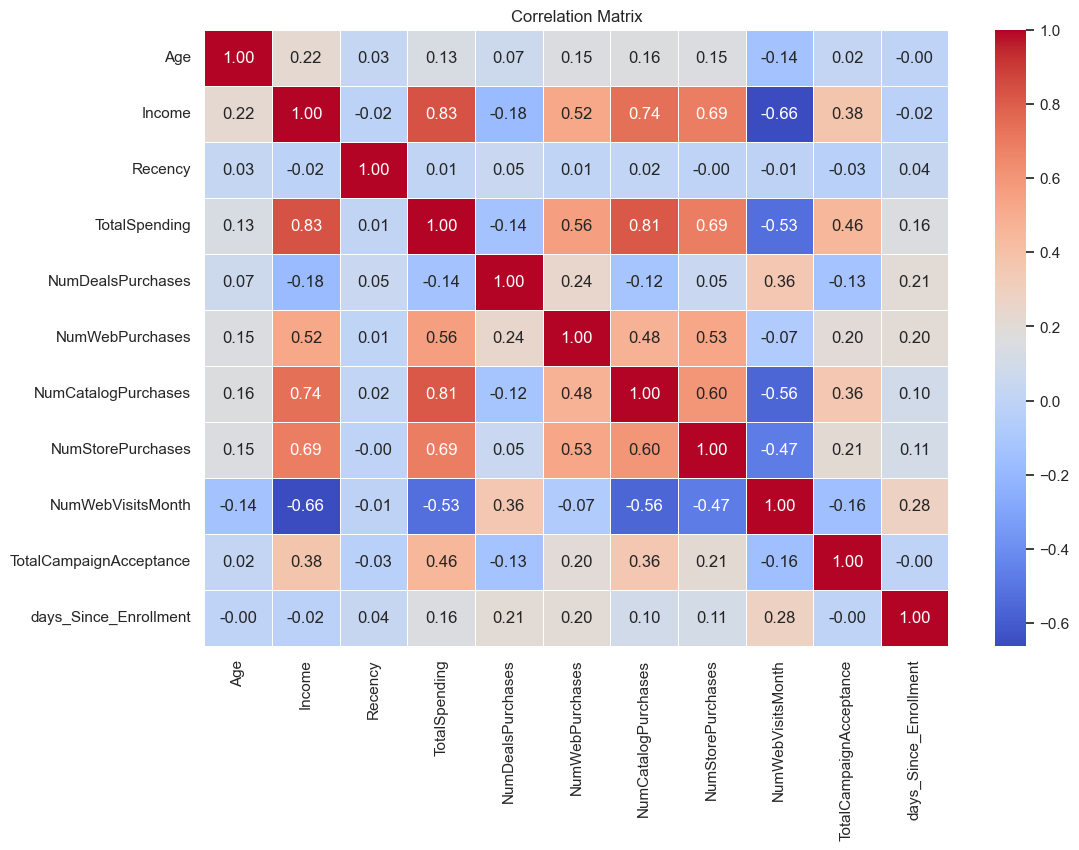

In [49]:
import pandas as pd

# Assuming 'data' is your DataFrame containing the data

# List of numerical columns/features for correlation calculation
'''numerical_columns = ['Age', 'Income', 'Recency', 'TotalSpending', 'NumDealsPurchases', 
                     'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
                     'NumWebVisitsMonth', 'TotalCampaignAcceptance', 'Complain', 
                     'days_Since_Enrollment']'''
numerical_columns = ['Age', 'Income', 'Recency', 'TotalSpending', 'NumDealsPurchases', 
                     'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
                     'NumWebVisitsMonth', 'TotalCampaignAcceptance',  
                     'days_Since_Enrollment']


# Select the numerical columns from the DataFrame
data_numerical = data[numerical_columns]

# Calculate correlation matrix
correlation_matrix = data_numerical.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()



This code calculates the correlation matrix for the numerical columns in your DataFrame and visualizes it using a heatmap. The correlation matrix shows the pairwise correlation coefficients between each pair of numerical features. This helps in understanding the relationships between different features and identifying potential patterns or dependencies in the data.

MACHINE LEARNING

In [50]:
#from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame containing the dataset
columns_to_scale = ['Income', 'Recency', 'TotalSpending', 'NumDealsPurchases', 'NumWebPurchases', 
                    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Selecting only the columns to scale
data_to_scale = data[columns_to_scale]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(data_to_scale)

# Overwrite the original columns with scaled values
data[columns_to_scale] = scaled_data

# Now your original 'data' DataFrame contains the scaled values

This code snippet scales the selected columns in your DataFrame using Min-Max scaling. This technique transforms the values of the selected columns to a range between 0 and 1, making them comparable and suitable for certain machine learning algorithms that require feature scaling.

In [51]:
# Assuming your data is loaded into a pandas dataframe called 'df'

# Define the target variable
target_variable = 'Response'  # Assuming 'Response' is what you want to predict

# Select all columns except the target variable as features
features = data.columns.tolist()
features.remove(target_variable)

# Separate features and target variable
X = data[features]
y = data[target_variable]
X.shape, y.shape

((1568, 16), (1568,))

This code snippet is for defining the target variable and separating the features and target variable in your dataset. It assumes that your DataFrame is named 'data', and the target variable is 'Response'. It selects all columns except the target variable as features and then separates the features (X) and the target variable (y). Finally, it prints the shapes of the features (X) and target variable (y) arrays.

In [52]:
##from sklearn.metrics import mean_absolute_error
#from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1254, 16)
X_test shape: (314, 16)
y_train shape: (1254,)
y_test shape: (314,)



This code snippet performs a train-test split on the features (X) and target variable (y) datasets. It splits the data into training and testing sets, with 80% of the data used for training and 20% for testing. After splitting, it prints the shapes of the resulting sets, including the training and testing sets for both features (X) and the target variable (y)

The output indicates the shapes of the training and testing sets:

X_train has 1254 samples and 16 features.
X_test has 314 samples and 16 features.
y_train has 1254 samples (corresponding to the target variable).
y_test has 314 samples (corresponding to the target variable)..

Logistic Regression

In [53]:
'''from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report'''

# Create a logistic regression model
logreg_model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = logreg_model.predict(X_train)

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print the evaluation metrics
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.89792663476874


This code creates a logistic regression model, fits it to the training data, makes predictions on the training set, evaluates the model's accuracy on the training set, and prints the training accuracy. This allows you to assess how well the logistic regression model is performing on the data it was trained on. 
The output is the training accuracy of the logistic regression model0.89792663476874:

In [54]:
y_test_pred = logreg_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8949044585987261



This part of the code makes predictions on the test set using the logistic regression model trained earlier. It then evaluates the model's accuracy on the test set and prints the test accuracy. This allows you to assess how well the logistic regression model generalizes to new, unseen data

With a test accuracy of approximately 89.49%, the logistic regression model performs quite well on the test set, indicating that it can effectively generalize to unseen data..

In [55]:
score = logreg_model.score(X_test, y_test)
score

0.8949044585987261


The score method in logistic regression model computes the accuracy of the model on the test data. It's equivalent to calling accuracy_score separately. Therefore, score should give the same result as the test accuracy we obtained earlier. Let's confirm it:

Yes, score gives the same result as the test accuracy we obtained earlier. The value is approximately 0.8949, which matches the test accuracIt indicates that approximately 89.49% of the predictions made by the logistic regression model on the test set were correcty.





In [57]:
#from sklearn.metrics import confusion_matrix, classification_report

# Predictions on the test set
y_test_pred = logreg_model.predict(X_test)

# Confusion matrix for test set
print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))

# Classification report for test set
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Confusion Matrix (Test Set):
[[261   7]
 [ 26  20]]
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       268
           1       0.74      0.43      0.55        46

    accuracy                           0.89       314
   macro avg       0.83      0.70      0.74       314
weighted avg       0.88      0.89      0.88       314



Decision Tree Classifier

In [59]:
'''from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report'''

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.8343949044585988

Confusion Matrix:
 [[238  30]
 [ 22  24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       268
           1       0.44      0.52      0.48        46

    accuracy                           0.83       314
   macro avg       0.68      0.70      0.69       314
weighted avg       0.85      0.83      0.84       314



Random Forest Classifier

In [60]:
'''from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score'''

# Load the dataset
#data = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with the actual path to your dataset

# Selecting features and target variable
#X = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
          #'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
#y = data['Response']  # Assuming 'Response' is the target variable you want to predict

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8949044585987261

Confusion Matrix:
 [[268   4]
 [ 29  13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       272
           1       0.76      0.31      0.44        42

    accuracy                           0.89       314
   macro avg       0.83      0.65      0.69       314
weighted avg       0.88      0.89      0.87       314



Gradient Boosting Classifier

In [61]:
#from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the classifier
print("Gradient Boosting Accuracy Score:", accuracy_score(y_test, y_pred_gb))
print("\nGradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("\nGradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy Score: 0.8853503184713376

Gradient Boosting Confusion Matrix:
 [[263   9]
 [ 27  15]]

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       272
           1       0.62      0.36      0.45        42

    accuracy                           0.89       314
   macro avg       0.77      0.66      0.70       314
weighted avg       0.87      0.89      0.87       314



Support Vector Machine(SVM)

In [62]:
'''from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report'''

# Initialize the Support Vector Machine Classifier
svm_classifier = SVC(random_state=42)

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.8662420382165605

Confusion Matrix:
 [[272   0]
 [ 42   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       272
           1       0.00      0.00      0.00        42

    accuracy                           0.87       314
   macro avg       0.43      0.50      0.46       314
weighted avg       0.75      0.87      0.80       314



C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

Naive Bayes Classifier

In [63]:
'''from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report'''

# Initialize the Naive Bayes Classifier
nb_classifier = GaussianNB()

# Fit the classifier to the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.8312101910828026

Confusion Matrix:
 [[243  29]
 [ 24  18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       272
           1       0.38      0.43      0.40        42

    accuracy                           0.83       314
   macro avg       0.65      0.66      0.65       314
weighted avg       0.84      0.83      0.84       314



Clustering

KMeans Algorithm

In [64]:
'''import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler'''

# Assuming 'data' is your preprocessed and scaled DataFrame containing customer data

# Select relevant features for clustering
behavior_features = ['Income', 'TotalSpending', 'NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[behavior_features])

# Define the number of clusters
num_clusters = 3  # You can adjust this based on your specific needs

# Perform KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Analyze the clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Convert cluster centers back to original scale
cluster_centers_df = pd.DataFrame(cluster_centers, columns=behavior_features)
cluster_centers_df.index.name = 'Cluster'
print(cluster_centers_df)

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


           Income  TotalSpending  NumDealsPurchases  NumWebPurchases  \
Cluster                                                                
0        0.683173       0.513929           0.196687         0.192086   
1        0.274147       0.033413           0.306602         0.073558   
2        0.484922       0.285362           0.621830         0.232287   

         NumStorePurchases  NumWebVisitsMonth  
Cluster                                        
0                 0.652015           0.283851  
1                 0.241712           0.636123  
2                 0.569398           0.629891  


Agglomerative Clustering.

In [65]:
'''import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler'''

# Assuming 'data' is your preprocessed and scaled DataFrame containing customer data

# Select relevant features for clustering
behavior_features = ['Income', 'TotalSpending', 'NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[behavior_features])

# Define the number of clusters
num_clusters = 3  # You can adjust this based on your specific needs

# Perform Hierarchical Agglomerative Clustering
hac = AgglomerativeClustering(n_clusters=num_clusters)
data['Cluster'] = hac.fit_predict(scaled_data)

# Since HAC does not have explicit cluster centers, you may want to analyze the clusters differently
# For example, you can calculate cluster statistics or visualize the dendrogram

# Analyze the clusters (for example, calculate cluster statistics)
cluster_stats = data.groupby('Cluster')[behavior_features].mean()
print(cluster_stats)


           Income  TotalSpending  NumDealsPurchases  NumWebPurchases  \
Cluster                                                                
0        0.650808       0.480855           0.279753         0.202874   
1        0.350645       0.136060           0.604007         0.174197   
2        0.277005       0.024312           0.238679         0.059679   

         NumStorePurchases  NumWebVisitsMonth  
Cluster                                        
0                 0.669243           0.359351  
1                 0.372615           0.661637  
2                 0.224673           0.629811  
